In [4]:
import os 
# current_working_directory = os.getcwd() # current_working_directory  C:\Users\Cloud\Desktop\LearnIndex
# print (current_working_directory)
# fo = open("./Data/POIs.pts", "r+")

list = []
count = 0
with open("./Data/POIs.pts", "r+") as f:
    for line in f:
        if line != "====\n":
            count+=1
            coord = line.strip().split(" ")
            x = float(coord[0])
            y = float(coord[1])
            z = 0
            list.append([x,y,z])
#             if count == 10:
#                 break

list.sort(key = lambda x:(x[0],x[1])) # first sory by x then sort by y

position = 0
for rows in list:
    rows[2]=position
    position+=1
    
print(list)


print("finished!!!")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [5]:
import csv
def write_csv_file(path, head, data):  
    try:  
        with open(path, 'w', newline='') as csv_file:  
            writer = csv.writer(csv_file, dialect='excel')  
  
            if head is not None:  
                writer.writerow(head)  
  
            for row in data:  
                writer.writerow(row)  
  
            print("Write a CSV file to path %s Successful." % path)  
    except Exception as e:  
        print("Write an CSV file to path: %s, Case: %s" % (path, e)) 

In [6]:
write_csv_file("./Data/SortedPOIs.csv",None,list)

Write a CSV file to path ./Data/SortedPOIs.csv Successful.


In [8]:
import pandas as pd
df = pd.read_csv("./Data/SortedPOIs.csv") #this will ingore the first line as it regard it as head
#print(df.columns)
#print(df.iloc[:,0])

In [9]:
import numpy as np
from sklearn import linear_model
lr = linear_model.LinearRegression()

train_x=df.iloc[:,0:2]
train_y=df.iloc[:,2]

#train_x=np.reshape(train_x,[-1, 1])
# train_y.reshape(-1, 1)
#print(train_x)

lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.01195979118347168


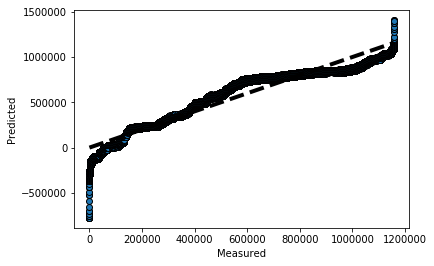

[ -748763.47948925  -751093.42736863  -776338.2409999  ...,
  1406526.09623251  1403311.01538784  1403317.38296567]


In [18]:
import matplotlib.pyplot as plt
import time
start_time=time.time()
predicted_y=lr.predict(train_x)
elapsed_time = time.time() - start_time
print(elapsed_time)

fig, ax = plt.subplots()
ax.scatter(train_y, predicted_y, edgecolors=(0, 0, 0))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print(predicted_y)

In [11]:
#print(predicted_y)
print((predicted_y< 0).sum())
print((predicted_y> 1157569).sum())

# estimate the result
from sklearn.metrics import explained_variance_score

# 1- Var(Ytrue - Ypred)/Var(Ytrue)  best: 1  the lower the worse
result = explained_variance_score(train_y, predicted_y)
print(result)

57427
344
0.934544634912


In [14]:
# calculate scan item amount
index = 0
scan = 0
totalscan = 0
for i in range(len(predicted_y)):
    index = predicted_y[i]
    scan = abs(index-i) # distance to exact
    totalscan += scan

print(totalscan/len(df))

33959.7269127


576.8207478523254


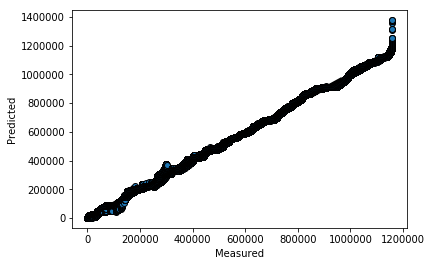

In [15]:
import time
from sklearn import neural_network
nnreg = neural_network.MLPRegressor(hidden_layer_sizes=(32, 2),max_iter=1000)
start_time=time.time()
nnreg.fit(train_x,train_y)
elapsed_time = time.time() - start_time
print(elapsed_time)
predicted_y=nnreg.predict(train_x)
fig, ax = plt.subplots()
ax.scatter(train_y, predicted_y, edgecolors=(0, 0, 0))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [16]:
#print(predicted_y)
print((predicted_y< 0).sum())
print((predicted_y> 1157569).sum())

# estimate the result
from sklearn.metrics import explained_variance_score

# 1- Var(Ytrue - Ypred)/Var(Ytrue)  best: 1  the lower the worse
result = explained_variance_score(train_y, predicted_y)
print(result)

0
7451
0.998660789352


In [17]:
# calculate scan item amount
index = 0
scan = 0
totalscan = 0
for i in range(len(predicted_y)):
    index = predicted_y[i]
    scan = abs(index-i) # distance to exact
    totalscan += scan

print(totalscan/len(df))

9212.74907364
